In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

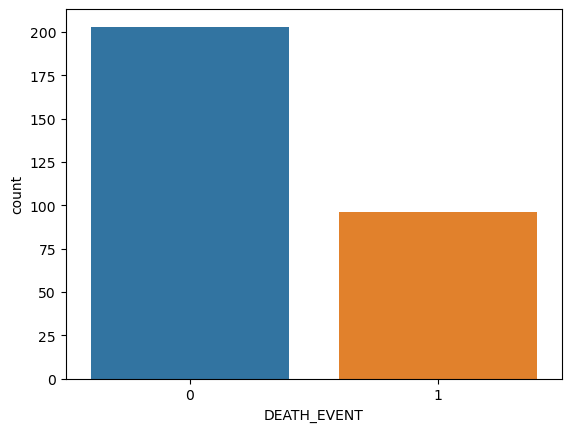

In [5]:
sns.countplot(x='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

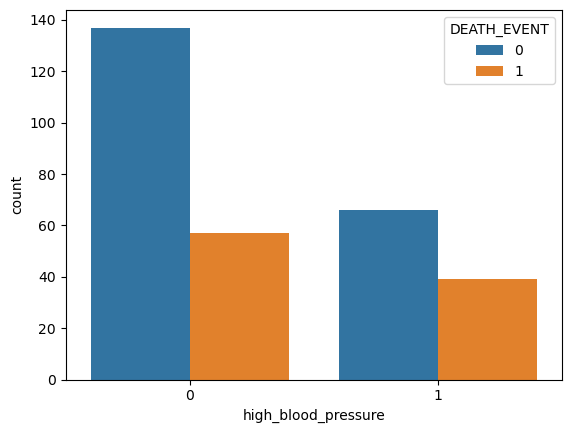

In [6]:
sns.countplot(x='high_blood_pressure', data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

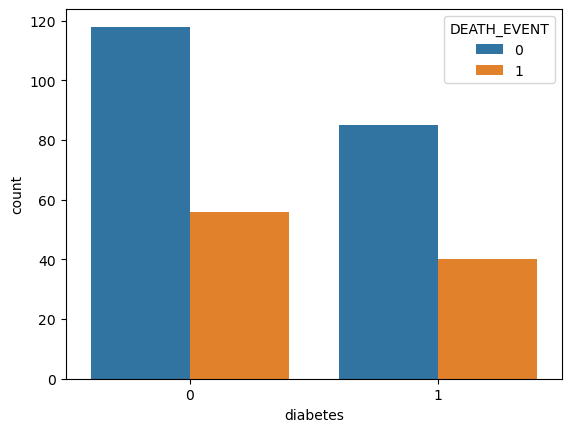

In [7]:
sns.countplot(x='diabetes', data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='anaemia', ylabel='count'>

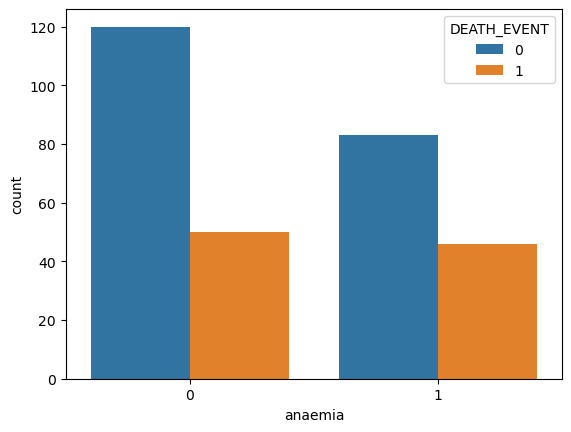

In [8]:
sns.countplot(x='anaemia', data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='sex', ylabel='count'>

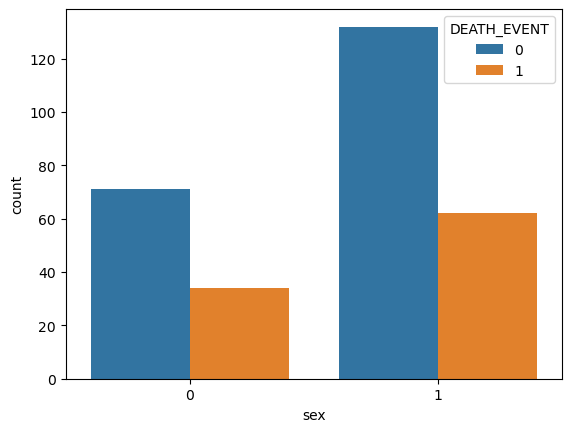

In [9]:
sns.countplot(x='sex', data=df, hue='DEATH_EVENT')

# Train Test Sep

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('DEATH_EVENT',axis=1), df[['DEATH_EVENT']], random_state=1,train_size=.70)

In [11]:
xtrain.shape

(209, 12)

In [12]:
xtrain.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209


In [13]:
xtest.shape

(90, 12)

In [14]:
ytest.shape

(90, 1)

In [15]:
ytest.head(3)

,DEATH_EVENT
173,0
287,0
51,1


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [17]:
dt.fit(xtrain, ytrain) #training done

DecisionTreeClassifier()

In [18]:
#let's predict
pred = dt.predict(xtrain) #training accuracy
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [19]:
ytrain.head()

,DEATH_EVENT
14,0
210,0
236,0
44,1
163,1


In [20]:
ytrain['Pred'] = pred

In [21]:
ytrain.head(10)

,DEATH_EVENT,Pred
14,0,0
210,0,0
236,0,0
44,1,1
163,1,1
292,0,0
117,0,0
258,0,0
41,1,1
79,0,0


In [22]:
ytrain.tail(20)

,DEATH_EVENT,Pred
241,0,0
215,0,0
68,1,1
50,1,1
156,0,0
252,0,0
254,0,0
276,0,0
178,0,0
281,0,0


In [23]:
dt.score(xtrain, ytrain['DEATH_EVENT'])

1.0

In [24]:
pred2 = dt.predict(xtest)
pred2 #testing result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [25]:
dt.score(xtest, ytest)

0.8

In [26]:
# ytest['pred2'] = pred2
ytest

,DEATH_EVENT
173,0
287,0
51,1
146,0
214,0
...,...
122,0
246,1
278,0
251,0


# Confusion Matrix

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,plot_roc_curve

In [28]:
classification_report(ytest['DEATH_EVENT'], pred2) # actual, predicted

'              precision    recall  f1-score   support\n\n           0       0.85      0.88      0.86        64\n           1       0.67      0.62      0.64        26\n\n    accuracy                           0.80        90\n   macro avg       0.76      0.75      0.75        90\nweighted avg       0.80      0.80      0.80        90\n'

In [29]:
print(classification_report(ytest['DEATH_EVENT'], pred2))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        64
           1       0.67      0.62      0.64        26

    accuracy                           0.80        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.80      0.80      0.80        90



In [30]:
# confusion matrix is use to calculate  & summarize the performance of the classification algorithms.
# It used in classification problems to assess where errors in the model were made.
# The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made.
# Using this table it is easy to see which predictions are wrong.
cm=confusion_matrix(ytest['DEATH_EVENT'], pred2)
cm

array([[56,  8],
       [10, 16]], dtype=int64)

<AxesSubplot:>

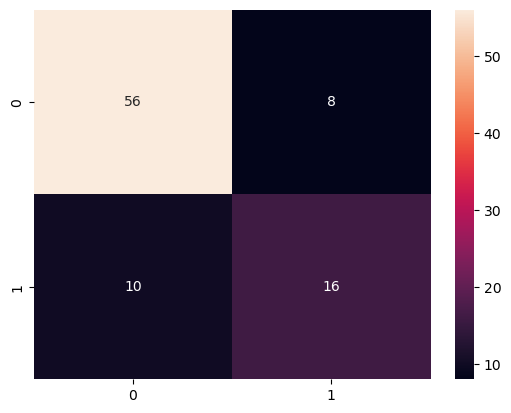

In [55]:
sns.heatmap(cm, annot=True)

In [32]:
(58+15) / (58+15+6+11)

0.8111111111111111

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest['DEATH_EVENT'], pred2)

0.8

In [34]:
dt.score(xtest, ytest['DEATH_EVENT'])

0.8

In [35]:
confusion_matrix(ytest['DEATH_EVENT'], pred2).reshape(-1)

array([56,  8, 10, 16], dtype=int64)

In [36]:
#a,b=10,20

In [37]:
tp, fp, fn, tn = confusion_matrix(ytest['DEATH_EVENT'], pred2).reshape(-1)

In [38]:
tp

56

In [39]:
fp

8

In [40]:
fn

10

In [41]:
tn

16

In [42]:
acc = (tp+tn)/(tp+fp+fn+tn)
acc

0.8

C:\Users\msalm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


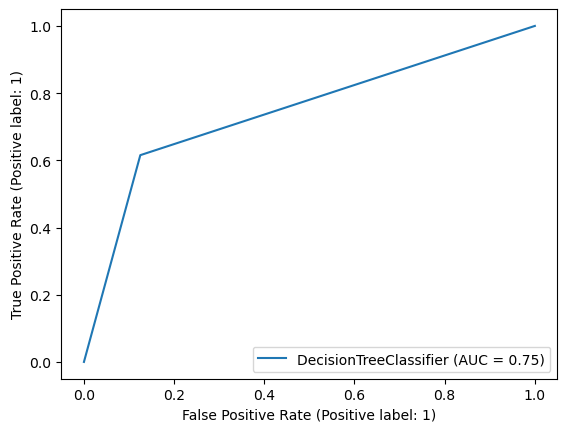

In [43]:
plot_roc_curve(dt, xtest , ytest['DEATH_EVENT'])

C:\Users\msalm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


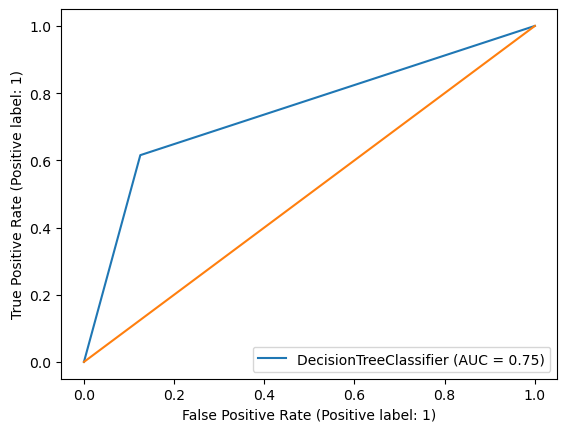

In [44]:
plot_roc_curve(dt, xtest , ytest['DEATH_EVENT'])
plt.plot([0,1],[0,1])

# Assignment

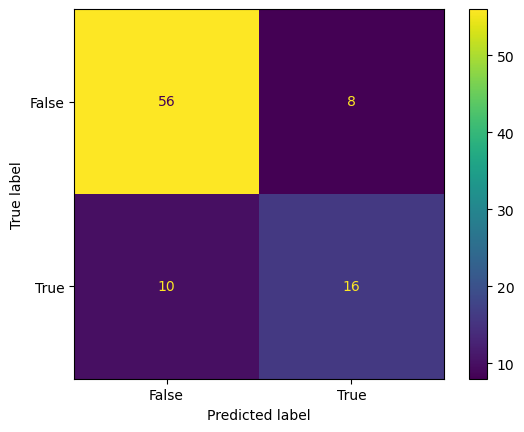

In [58]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

# Accuracy / Recognition Rate

In [45]:
# Accuracy = (TP + TN ) / (TP + FP + TN + FN)
acc = (tp + tn)/(tp + fp + fn + tn)
acc

0.8

# Precision or Positive Predictive Value (PPV)

In [46]:
# PPV = True Positive / (True Positive + False Positive)
# Precision = tp / ( tp + fp )
ppv = tp/(tp + fp)
ppv

0.875

# Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)

In [47]:
# TPR = True Positive / (True Positive + False Negative)


In [48]:
tpr = tp/(tp + fn)
tpr

0.8484848484848485

# False Positive Rate (FPR) or 1-Specificity

In [49]:
# FPR = False Positive / (False Positive + True Negative)
fpr = fp/(fp + tn)
fpr

0.3333333333333333

# Specificity, Selectivity or True Negative Rate (TNR)

In [50]:
# Specificity = True Negative / (True Negative + False Positive)
tnr = tn/(tn + fp)
tnr

0.6666666666666666

# Threat Score (TS) or Critical Success Index (CSI)

In [51]:
# TS/CSI = True Positive / (True Positive + False Negative + False Positive)
ts_or_csi = tp/(tp + fn + fp)
ts_or_csi

0.7567567567567568

# False Discovery Rate (FDR)

In [52]:
# False Discovery Rate = False Positive / (True Positive + False Positive )
fdr = fp/(tp + fp)
fdr

0.125

# Harmonic Mean, F-Measure

In [53]:
# F-measure: harmonic mean of recall and precision: = (2 * Precision * Recall) / (Precision + Recall)
hmf_measure = (2 * ppv * tpr)/(ppv + tpr)
hmf_measure

0.8615384615384615

# ROC & AUC Curve

C:\Users\msalm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


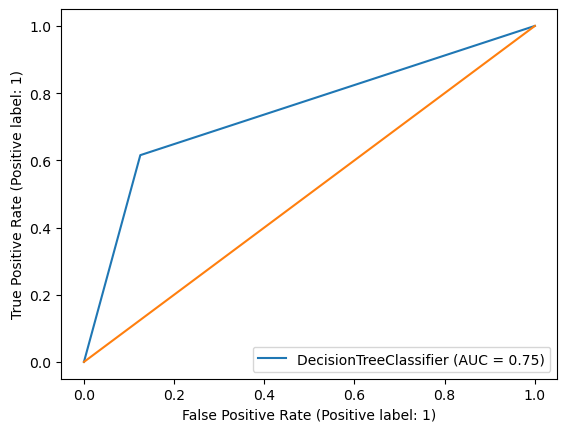

In [54]:
# AUC, area under the receiver operating characteristic (ROC) curve.
# ROC curve plots the true positive (TP) rate versus the false positive (FP) rate at different classification thresholds.
plot_roc_curve(dt, xtest, ytest['DEATH_EVENT'])
plt.plot([0,1], [0,1])